In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit

import acquire as a
import prepare as p

# Exercise

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
# Starting with superstore dataset
df = p.get_superstore_df()

In [3]:
df.head()

,sale_amount,item_price,sales_total,month,day_of_week,item_id,store_id,sale_id,item_name,item_brand,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,0.84,10.92,January,Tuesday,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,1.16,30.16,January,Tuesday,17,3,295813,Ducal Refried Red Beans,Ducal,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,32.0,9.64,308.48,January,Tuesday,7,10,125995,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,45.0,4.39,197.55,January,Tuesday,18,3,314073,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,34.0,0.74,25.16,January,Tuesday,19,3,332333,Careone Family Comb Set - 8 Ct,Careone,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


In [4]:
tscv = TimeSeriesSplit(n_splits=2)

In [5]:
train_index, test_index = next(tscv.split(df))

In [6]:
train_index

array([     0,      1,      2, ..., 304331, 304332, 304333])

In [7]:
test_index

array([304334, 304335, 304336, ..., 608664, 608665, 608666])

In [8]:
train = df.iloc[train_index]
test = df.iloc[test_index]

In [9]:
train.head()

,sale_amount,item_price,sales_total,month,day_of_week,item_id,store_id,sale_id,item_name,item_brand,item_upc14,store_address,store_city,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01,13.0,0.84,10.92,January,Tuesday,1,1,1,Riceland American Jazmine Rice,Riceland,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2013-01-01,26.0,1.16,30.16,January,Tuesday,17,3,295813,Ducal Refried Red Beans,Ducal,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,32.0,9.64,308.48,January,Tuesday,7,10,125995,Twinings Of London Classics Lady Grey Tea - 20 Ct,Twinings Of London,70177154004,8503 NW Military Hwy,San Antonio,TX,78231
2013-01-01,45.0,4.39,197.55,January,Tuesday,18,3,314073,Scotch Removable Clear Mounting Squares - 35 Ct,Scotch,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201
2013-01-01,34.0,0.74,25.16,January,Tuesday,19,3,332333,Careone Family Comb Set - 8 Ct,Careone,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201


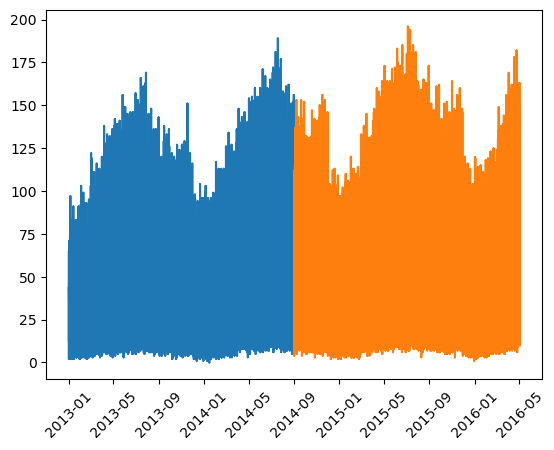

In [10]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.xticks(rotation=45)
plt.show()

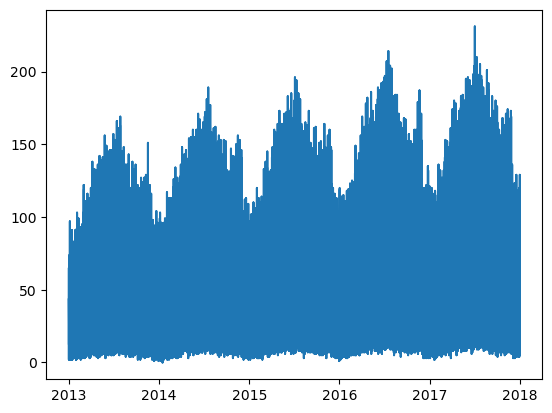

In [11]:
# TimeSeriesSplit doesn't seem too logical, so now I'll plot the whole df and split on something human based
plt.plot(df.index, df.sale_amount)

In [12]:
train = df.loc[:'2017']
test = df.loc['2017':]

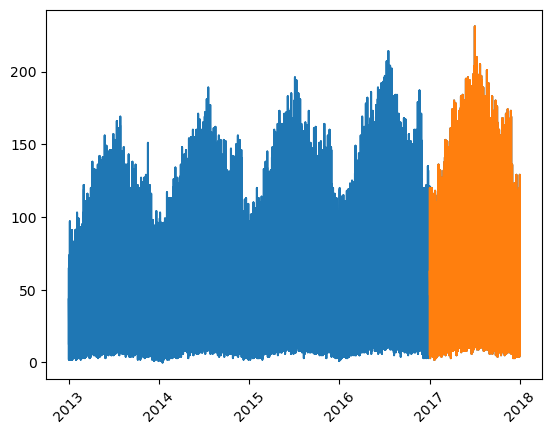

In [13]:
# replot
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)
plt.xticks(rotation=45)
plt.show()

In [14]:
# put target sale_amount into y for ease
y= train.sale_amount
y.head()

sale_date
2013-01-01    13.0
2013-01-01    26.0
2013-01-01    32.0
2013-01-01    45.0
2013-01-01    34.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

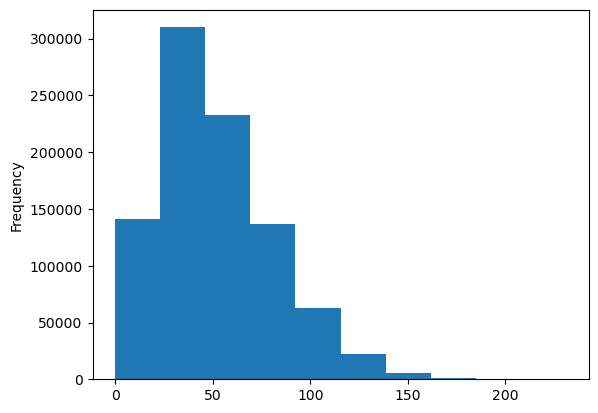

In [15]:
# don't consider time series for now
y.plot.hist()

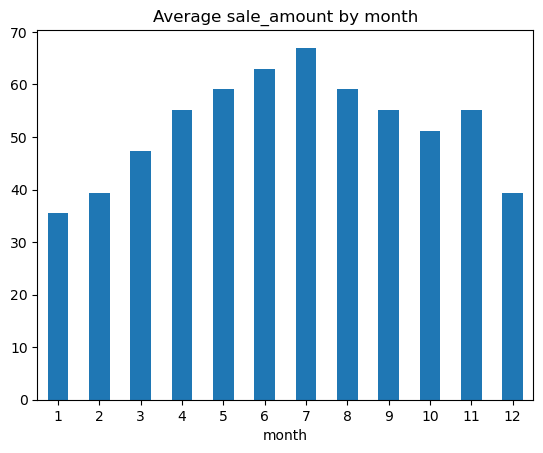

In [16]:
# plot monthly means
y.groupby(y.index.month).mean().plot.bar()
plt.title('Average sale_amount by month')
plt.xticks(rotation=0)
plt.xlabel('month')
plt.show()

In [19]:
# assign a weekday column and a day_num column for use in plotting

# start here or just move on. I have the plot below, just not as pretty

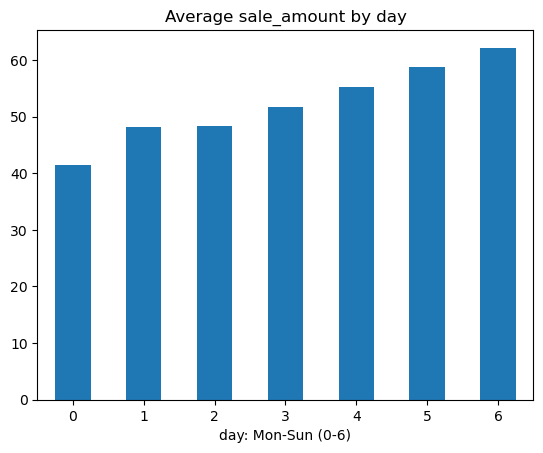

In [17]:
# plot daily means
y.groupby(y.index.weekday).mean().plot.bar()
plt.title('Average sale_amount by day')
plt.xticks(rotation=0)
plt.xlabel('day: Mon-Sun (0-6)')
plt.show()